### 4.3.5 The 2nd-order Runge-Kutta method (or Heun's method)

A very popular method for solving scalar and vector ODEs of first order is the 2nd-order Runge-Kutta method (RK2), also known as Heun's method. The idea, first thinking of a scalar ODE, is to form a $centered$ $difference$ approximation to the derivative between two time points:

$$ u'(t_n + \frac{1}{2} \Delta t) \approx \frac{u^{n+1}-u^{n}}{\Delta t}. $$

The error in the centered differece is proportional to $\Delta t ^2$, one order higher than the forward and backward differences, which means that if we halve $\Delta t$, the error is more effectively reduced in the centered difference since it is reduced by a factor of four rather tahn two.

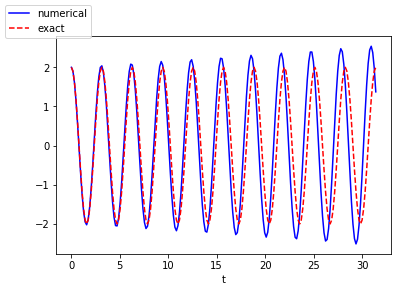

In [2]:
from numpy import zeros, linspace, pi, cos
import matplotlib.pyplot as plt

def osc_Heun(X_0, omega, dt, T):
    N_t = int(round(T/dt))
    u = zeros(N_t+1)
    v = zeros(N_t+1)
    t = linspace(0, N_t*dt, N_t+1)
    
    # Initial condition
    u[0] = X_0
    v[0] = 0
    
    # Step equations forward in time
    for n in range(N_t):
        u_star = u[n] + dt*v[n]
        v_star = v[n] - dt*omega**2*u[n]
        u[n+1] = u[n] + 0.5*dt*(v[n] + v_star)
        v[n+1] = v[n] - 0.5*dt*omega**2*(u[n] + u_star)
    return u, v, t

def demo():
    omega = 2
    P = 2*pi/omega
    dt = P/20
    T = 10*P
    X_0 = 2
    u, v, t = osc_Heun(X_0, omega, dt, T)
    
    fig = plt.figure()
    l1, l2 = plt.plot(t, u, 'b', t, X_0*cos(omega*t), 'r--')
    fig.legend((l1, l2), ('numerical', 'exact'), 'upper left')
    plt.xlabel('t')
    plt.show()
    
if __name__ == '__main__':
    demo()
    

We can see that the amplitude grows, but not as much as for the Forward Euler method. However, the Euler-Cromer methid is much better! We should add that in problems where the Forward Euler method gives satisfactory approximations, such as growth/decay problems. 


The 2nd-order Runge-Kutta method or Heun's method, usually works considerably better and produces greater accuracy for the same computational cost. It is therefore a very valuable method to be aware of, although it cannot compute with the Euler-Cromer scheme for oscillation problems. The derivation of the RK2/Heun scheme is also good general training in "numerical thinking"